In [1]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [2]:
from pyTVDN import TVDNDetect
from pathlib import Path
from scipy.io import loadmat
from scipy.signal import detrend
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.signal import lfilter, firls, decimate
from tqdm import tqdm_notebook as tqdm
from easydict import EasyDict as edict
from collections import Counter

In [3]:
dataDir = Path("../data")

filname = Path("fMRI_samples.mat")
fMRIs = loadmat(dataDir/filname)["clean_subjects"]

In [4]:
fs = 0.5 #sampling frequency
fmin = 0.009 # 
fmax = 0.08
hbp = firls(21, np.array([0, 0.009, 0.01, 0.08, 0.09, 0.8]), #0.8
           desired = np.array([0, 0, 1, 1, 0, 0]))

num = fMRIs.shape[-1]
fMRIsHPF = []
for i in range(num):
    cfMRI = fMRIs[0, i]["fMRI"][:90, :]
    # detrend
    cfMRI = detrend(cfMRI)
    chpffMRI = lfilter(hbp, 1, cfMRI)
    fMRIsHPF.append(chpffMRI[:, 25:])

In [6]:
# data to detect
Ymat = fMRIsHPF[0]
    
Lmin = 4
lamb = 8e-5
kappa = 1.83
kappas = np.arange(1, 4, 0.01)

# Screening
DetRecScreening = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                  saveDir=None, showProgress=True, Lmin=Lmin, lamb=lamb, kappa=kappa, r=None)

# No screening
DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                  saveDir=None, showProgress=True, Lmin=Lmin, lamb=lamb, kappa=kappa, r=None)

The parameters for detection are:
{'Lmin': 4,
 'MaxM': 20,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': False,
 'kappa': 1.83,
 'lamb': 8e-05,
 'nbasis': 10,
 'r': None}
The parameters for detection are:
{'Lmin': 4,
 'MaxM': 20,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': False,
 'kappa': 1.83,
 'lamb': 8e-05,
 'nbasis': 10,
 'r': None}


### Detect

If `n` is small, screening is not needed

In [7]:
DetRecScreening.Screening(wh=4)
DetRecScreening()

DetRec()

### Print the results

In [8]:
print(DetRecScreening)
print(DetRec)

+-------------+-----------------------+--------------------+------+
| Num of CPTs |     Estiamted CPTs    |        MSE         | Rank |
+-------------+-----------------------+--------------------+------+
|      5      | [ 23  52  85 109 126] | 3.8098581583577253 |  8   |
+-------------+-----------------------+--------------------+------+
+-------------+-------------------------------+--------------------+------+
| Num of CPTs |         Estiamted CPTs        |        MSE         | Rank |
+-------------+-------------------------------+--------------------+------+
|      7      | [ 23  41  64  83  97 110 128] | 2.6087824539549542 |  8   |
+-------------+-------------------------------+--------------------+------+


### Plot the results

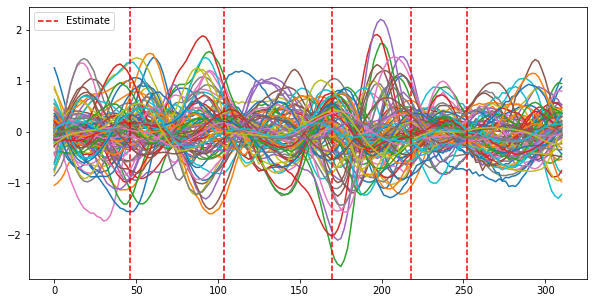

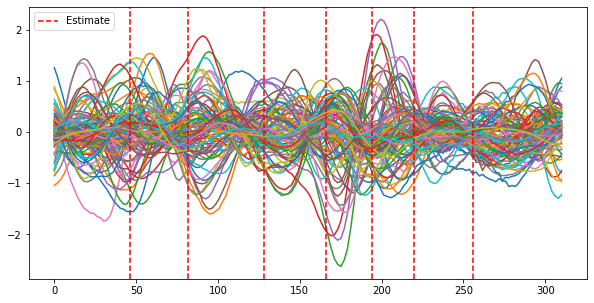

In [9]:
DetRecScreening.PlotEcpts()
DetRec.PlotEcpts()

### Reconstruced plot

The plot indices are [36 75 20 26  3].


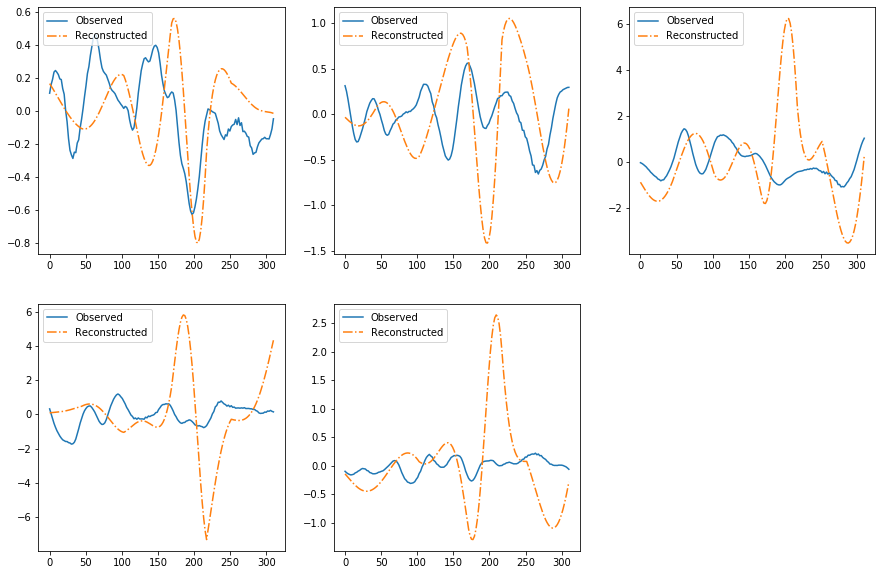

The plot indices are [74 56 63 66 13].


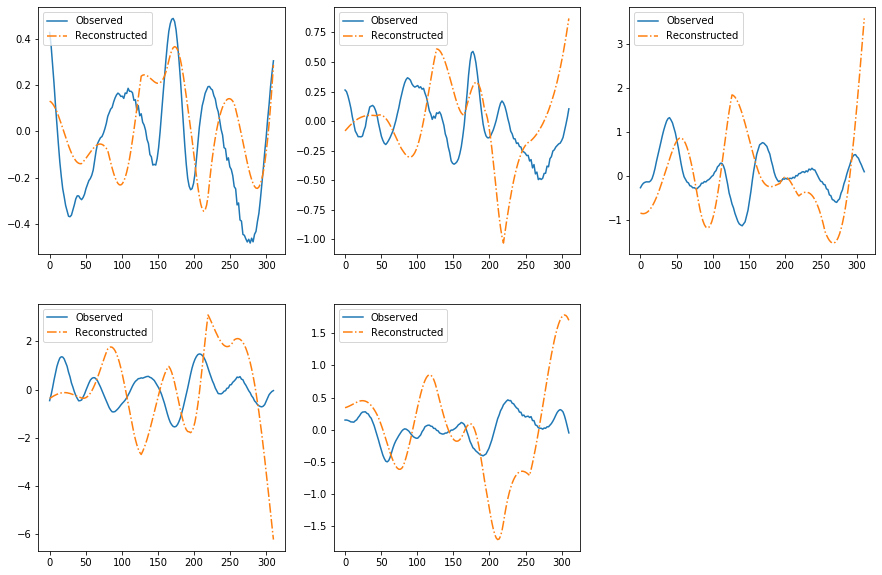

array([74, 56, 63, 66, 13])

In [10]:
DetRecScreening.PlotRecCurve()
DetRec.PlotRecCurve()

### Eigen plots

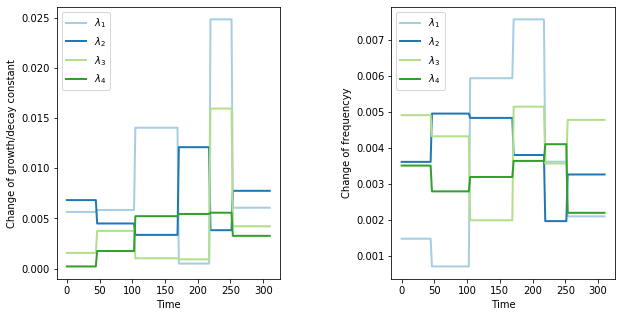

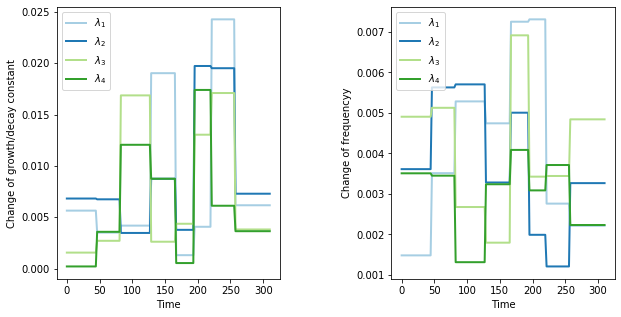

In [11]:
DetRecScreening.PlotEigenCurve()
DetRec.PlotEigenCurve()